In [20]:
import os, re, glob
import numpy as np
import matplotlib.pyplot as plt

# -------- Drug lists for 3g, 4g, 8g (to get normalization constants) --------
drug_lists_3g = {
    0: [0.994, 0.997, 1.009], 
    1: [1.000, 0.991, 1.008],
    2: [0.999, 1.003, 0.994],
    3: [0.993, 1.005, 1.002],
}
drug_lists_4g = {
    0: [0.993, 0.998, 1.009, 1.003],
    1: [1.005, 0.988, 0.999, 1.001],
    2: [0.997, 1.001, 0.989, 1.003],
    3: [0.995, 1.005, 1.002, 0.999],
}
drug_lists_8g = {
    0: [0.993, 0.998, 1.009, 1.003, 1.007, 1.001, 0.992, 0.997],
    1: [0.995, 1.005, 1.002, 0.999, 1.005, 0.994, 0.999, 1.001],
    2: [0.997, 1.001, 0.989, 1.003, 1.003, 0.998, 1.010, 0.997],
    3: [1.005, 0.988, 0.999, 1.001, 0.995, 1.011, 1.000, 0.999],
}

def get_norm_constants(drug_lists):
    all_fits = np.concatenate(list(map(np.array, drug_lists.values())))
    return all_fits.min(), all_fits.max()

norms = {
    "3g": get_norm_constants(drug_lists_3g),
    "4g": get_norm_constants(drug_lists_4g),
    "8g": get_norm_constants(drug_lists_8g),
}

# --------- File patterns ----------
pat_3g = '/Users/peng/Desktop/SHEPHERD/resolution/3g-results-L/3g_mean_std_L*.npz'
pat_4g = '/Users/peng/Desktop/SHEPHERD/resolution/4g-results-L/4g_mean_std_L*.npz'
pat_8g = '/Users/peng/Desktop/SHEPHERD/resolution/8g-results-L/8g_mean_std_L*.npz'

files_3g = glob.glob(pat_3g)
files_4g = glob.glob(pat_4g)
files_8g = glob.glob(pat_8g)

# --------- Helpers ----------
def extract_L(path):
    return int(re.search(r'_L(\d+)\.npz$', os.path.basename(path)).group(1))

def reduce_file(path, group, tail_len=100):
    """Load .npz and return (L, normed_mean, normed_sd)."""
    L = extract_L(path)
    data = np.load(path)
    t       = data['t']
    meanfit = data['mean_fit']
    stdfit  = data['std_fit']
    if meanfit.ndim == 2: meanfit = meanfit[-1]
    if stdfit.ndim == 2:  stdfit  = stdfit[-1]
    tail_start = max(t[-1] - tail_len, t[0])
    mask = (t >= tail_start)
    mean_val = np.mean(meanfit[mask])
    sd_val   = np.mean(stdfit[mask])

    # normalize using group’s global min/max
    gmin, gmax = norms[group]
    denom = gmax - gmin
    mean_val = (mean_val - gmin) / denom
    sd_val   = sd_val / denom

    return L, mean_val, sd_val

def load_group(files, group):
    if not files: return np.array([]), np.array([]), np.array([])
    triplets = [reduce_file(f, group) for f in files]
    Ls, means, sds = map(np.array, zip(*triplets))
    order = np.argsort(Ls)
    return Ls[order], means[order], sds[order]

# --------- Load & normalize all three groups ----------
Ls3, m3, s3 = load_group(files_3g, "3g")
Ls4, m4, s4 = load_group(files_4g, "4g")
Ls8, m8, s8 = load_group(files_8g, "8g")


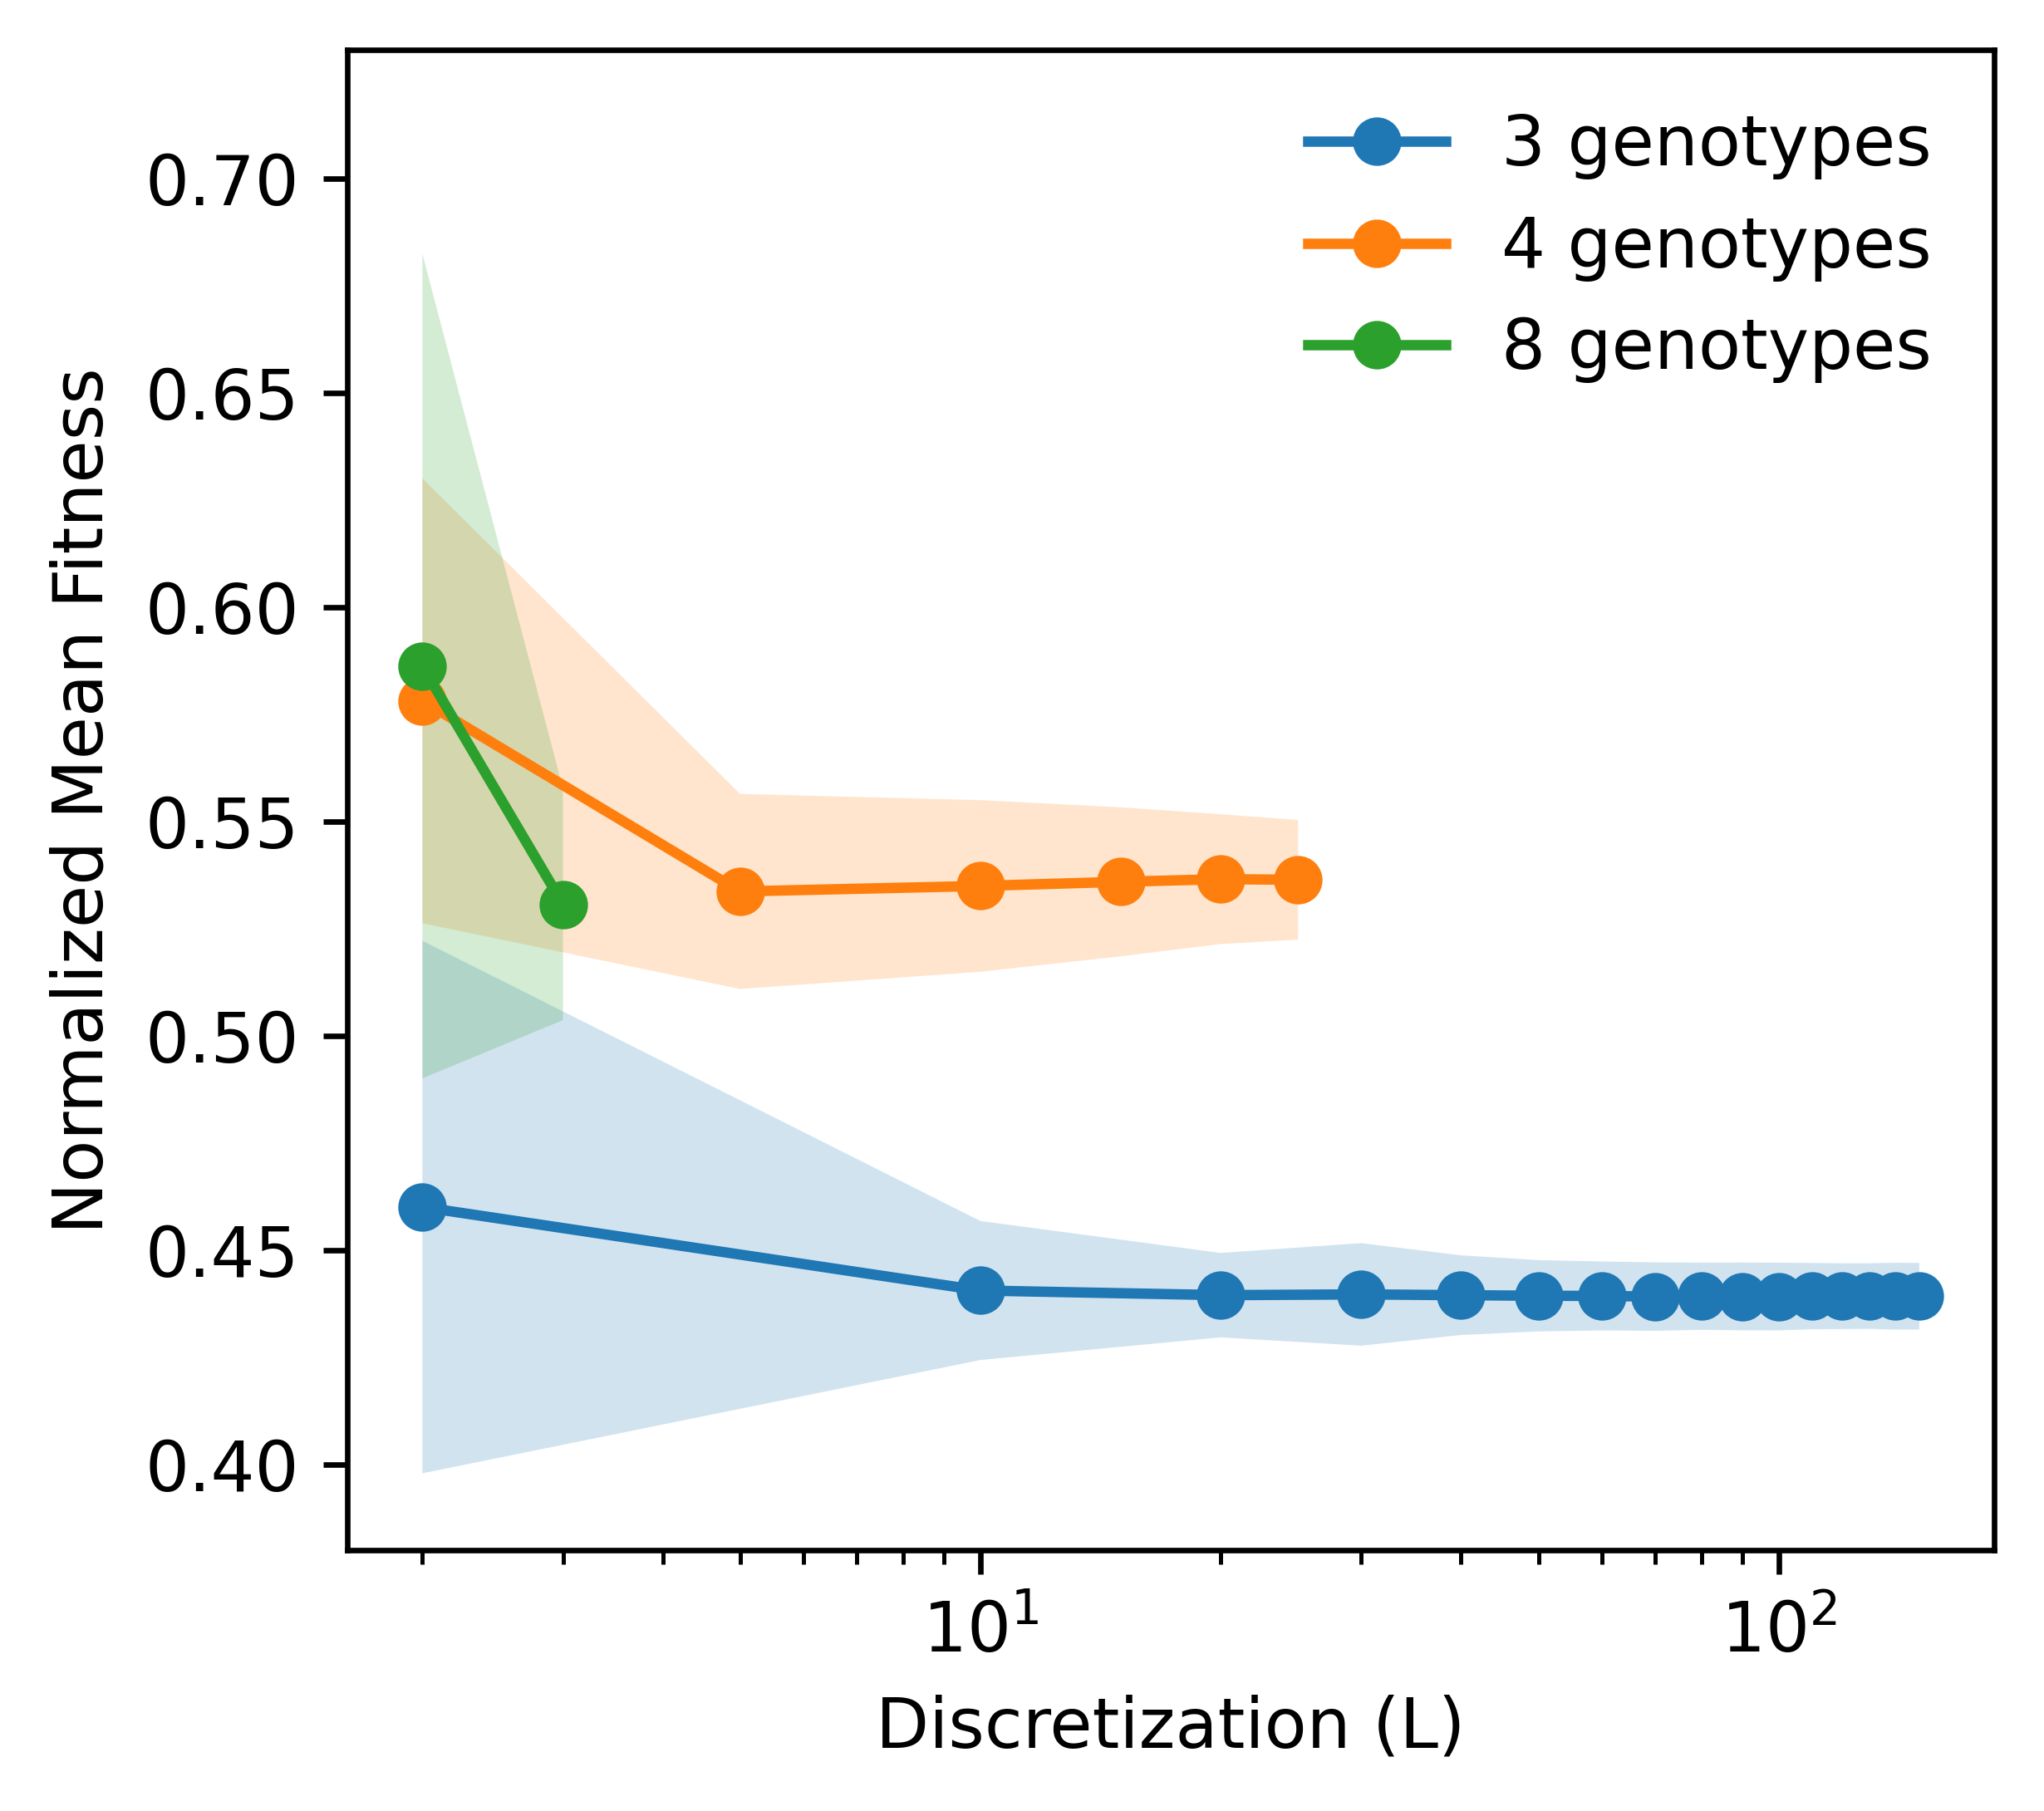

In [21]:
# --------- Plot: three lines with ±SD shading, normalized ---------
plt.figure(figsize=(4.2, 4/4.5*4.2), dpi=600)

def plot_band(Ls, m, s, label):
    if Ls.size == 0: return
    plt.plot(Ls, m, marker='o', label=label)
    plt.fill_between(Ls, m - s, m + s, alpha=0.2)

plot_band(Ls3, m3, s3, "3 genotypes")
plot_band(Ls4, m4, s4, "4 genotypes")
plot_band(Ls8, m8, s8, "8 genotypes")

plt.xlabel("Discretization (L)")
plt.ylabel("Normalized Mean Fitness")
#plt.title("Normalized MDP fitness vs L with ±SD (3g/4g/8g)")
plt.xscale("log")
plt.ylim(0.38, 0.73)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

In [22]:
import os, re, glob
import numpy as np
import matplotlib.pyplot as plt

# -------- Drug lists for 3g, 4g, 8g (to get normalization constants) --------
drug_lists_3g = {
    0: [0.994, 0.997, 1.009], 
    1: [1.000, 0.991, 1.008],
    2: [0.999, 1.003, 0.994],
    3: [0.993, 1.005, 1.002],
}
drug_lists_4g = {
    0: [0.993, 0.998, 1.009, 1.003],
    1: [1.005, 0.988, 0.999, 1.001],
    2: [0.997, 1.001, 0.989, 1.003],
    3: [0.995, 1.005, 1.002, 0.999],
}
drug_lists_8g = {
    0: [0.993, 0.998, 1.009, 1.003, 1.007, 1.001, 0.992, 0.997],
    1: [0.995, 1.005, 1.002, 0.999, 1.005, 0.994, 0.999, 1.001],
    2: [0.997, 1.001, 0.989, 1.003, 1.003, 0.998, 1.010, 0.997],
    3: [1.005, 0.988, 0.999, 1.001, 0.995, 1.011, 1.000, 0.999],
}

def get_norm_constants(drug_lists):
    all_fits = np.concatenate(list(map(np.array, drug_lists.values())))
    return all_fits.min(), all_fits.max()

norms = {
    "3g": get_norm_constants(drug_lists_3g),
    "4g": get_norm_constants(drug_lists_4g),
    "8g": get_norm_constants(drug_lists_8g),
}

# --------- File patterns ----------
pat_3g = '/Users/peng/Desktop/SHEPHERD/resolution/3g-results-dt/3g_mean_std_dt*.npz'
pat_4g = '/Users/peng/Desktop/SHEPHERD/resolution/4g-results-dt/4g_mean_std_dt*.npz'
pat_8g = '/Users/peng/Desktop/SHEPHERD/resolution/8g-results-dt/8g_mean_std_dt*.npz'

files_3g = glob.glob(pat_3g)
files_4g = glob.glob(pat_4g)
files_8g = glob.glob(pat_8g)

# --------- Helpers ----------
def extract_L(path):
    return int(re.search(r'_dt(\d+)\.npz$', os.path.basename(path)).group(1))

def reduce_file(path, group, tail_len=100):
    """Load .npz and return (L, normed_mean, normed_sd)."""
    L = extract_L(path)
    data = np.load(path)
    t       = data['t']
    meanfit = data['mean_fit']
    stdfit  = data['std_fit']
    if meanfit.ndim == 2: meanfit = meanfit[-1]
    if stdfit.ndim == 2:  stdfit  = stdfit[-1]
    tail_start = max(t[-1] - tail_len, t[0])
    mask = (t >= tail_start)
    mean_val = np.mean(meanfit[mask])
    sd_val   = np.mean(stdfit[mask])

    # normalize using group’s global min/max
    gmin, gmax = norms[group]
    denom = gmax - gmin
    mean_val = (mean_val - gmin) / denom
    sd_val   = sd_val / denom

    return L, mean_val, sd_val

def load_group(files, group):
    if not files: return np.array([]), np.array([]), np.array([])
    triplets = [reduce_file(f, group) for f in files]
    Ls, means, sds = map(np.array, zip(*triplets))
    order = np.argsort(Ls)
    return Ls[order], means[order], sds[order]

# --------- Load & normalize all three groups ----------
Ls3, m3, s3 = load_group(files_3g, "3g")
Ls4, m4, s4 = load_group(files_4g, "4g")
Ls8, m8, s8 = load_group(files_8g, "8g")


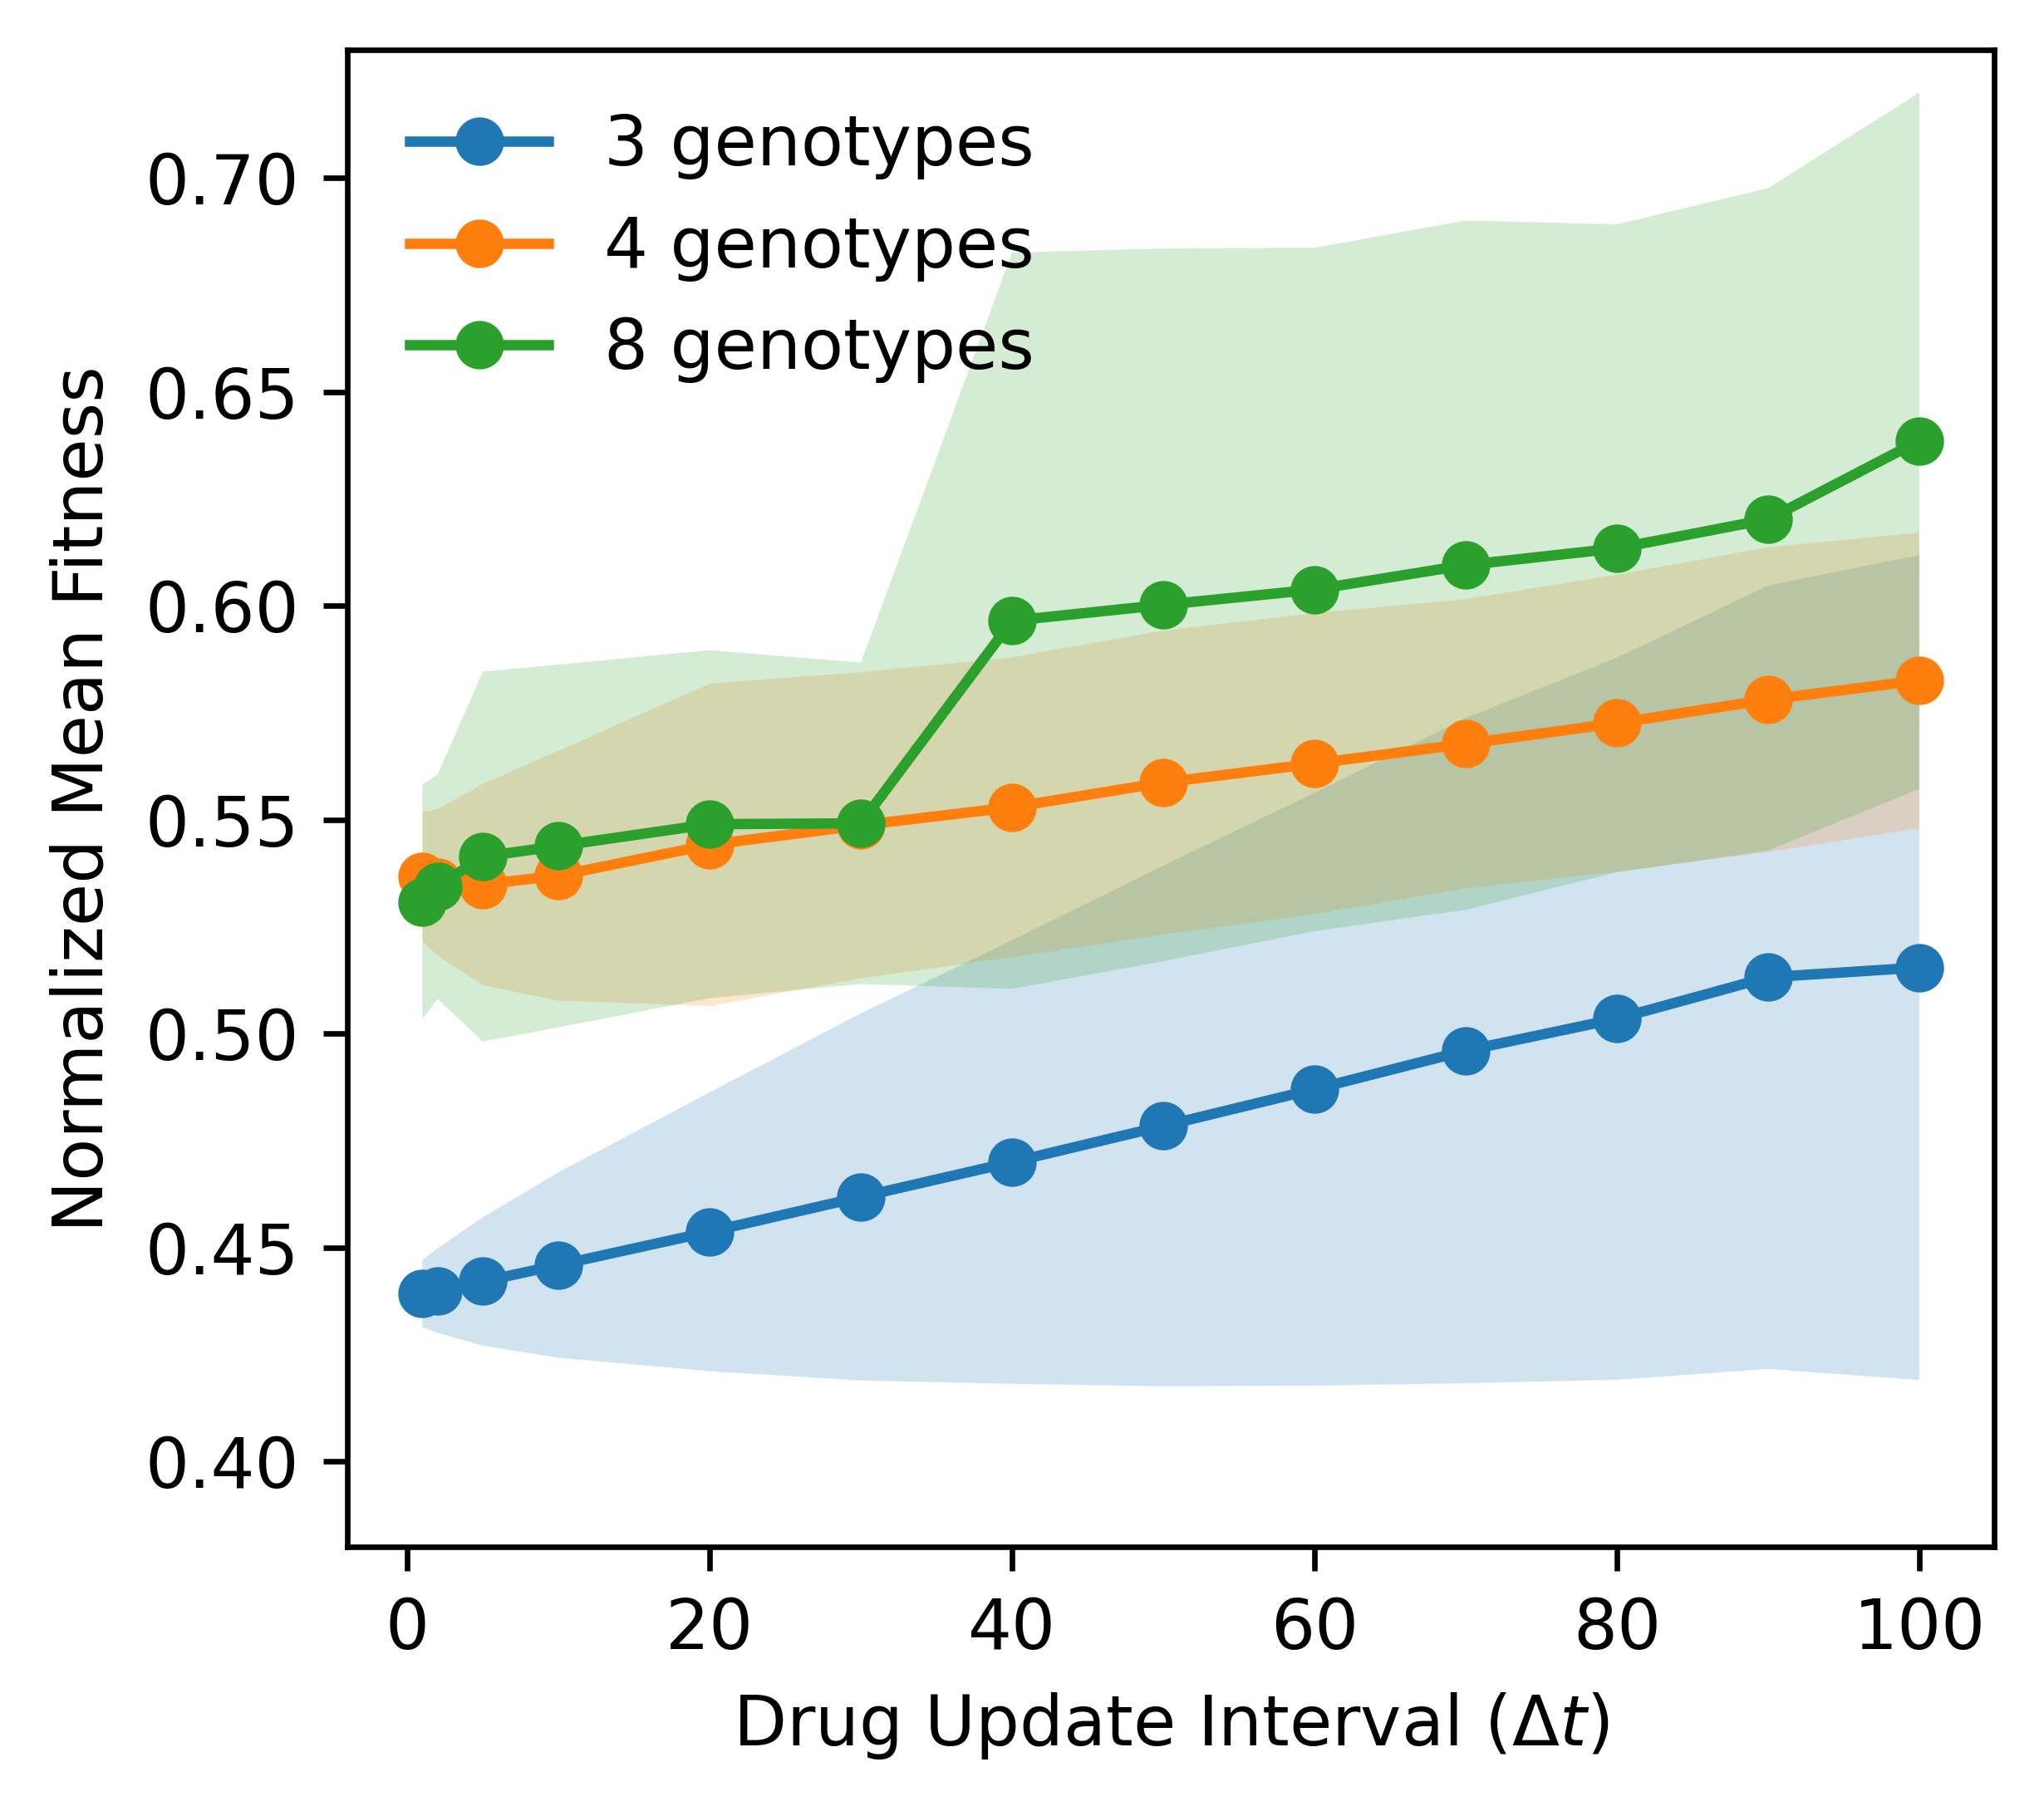

In [23]:
# --------- Plot: three lines with ±SD shading, normalized ---------
plt.figure(figsize=(4.2, 4/4.5*4.2), dpi=600)

def plot_band(Ls, m, s, label):
    if Ls.size == 0: return
    plt.plot(Ls, m, marker='o', label=label)
    plt.fill_between(Ls, m - s, m + s, alpha=0.2)

plot_band(Ls3, m3, s3, "3 genotypes")
plot_band(Ls4, m4, s4, "4 genotypes")
plot_band(Ls8, m8, s8, "8 genotypes")

plt.xlabel(r"Drug Update Interval ($\Delta t$)")
plt.ylabel("Normalized Mean Fitness")
plt.ylim(0.38, 0.73)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()